In [1]:
# ex 1

from mlxtend.data import loadlocal_mnist
import numpy as np
from sklearn.model_selection import GridSearchCV, train_test_split, StratifiedKFold
from sklearn import tree
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
from openpyxl import load_workbook
from keras.optimizers import SGD
from keras import optimizers
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM, GRU
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU
from math import sqrt
from matplotlib import pyplot
from pandas import DataFrame, Series, concat, read_csv, datetime

Using TensorFlow backend.


In [2]:
# ex 1

images_path = r"D:\Python\mnist\train-images.idx3-ubyte"
labels_path = r"D:\Python\mnist\train-labels.idx1-ubyte"

X_train, Y_train = loadlocal_mnist(
        images_path = images_path, 
        labels_path = labels_path)

In [3]:
print('Dimensions: %s x %s' % (X_train.shape[0], X_train.shape[1]))
print('\n1st row', X_train[0])

Dimensions: 60000 x 784

1st row [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 1

In [4]:
print('labels: %s' % np.unique(Y_train))
print('Class distribution: %s' % np.bincount(Y_train))

labels: [0 1 2 3 4 5 6 7 8 9]
Class distribution: [5923 6742 5958 6131 5842 5421 5918 6265 5851 5949]


In [5]:
images_path = r"D:\Python\mnist\t10k-images.idx3-ubyte"
labels_path = r"D:\Python\mnist\t10k-labels.idx1-ubyte"

X_test, Y_test = loadlocal_mnist(
        images_path = images_path, 
        labels_path = labels_path)

In [6]:
print('Dimensions: %s x %s' % (X_test.shape[0], X_test.shape[1]))
print('\n1st row', X_test[0])

Dimensions: 10000 x 784

1st row [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0  84 185 159 151  60  36   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0 222 254 254 254
 254 241 198 198 1

In [7]:
dtc = tree.DecisionTreeClassifier()

In [8]:
param_grid = [
    {'max_depth': [20], 'min_samples_leaf': [2]}]

grid_search = GridSearchCV(dtc, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, Y_train)

print(grid_search.best_params_)
print(grid_search.best_estimator_)

{'max_depth': 20, 'min_samples_leaf': 2}
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=20,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


In [9]:
dtc = grid_search.best_estimator_

predictions = dtc.predict(X_test)

print('Accuracy:', accuracy_score(Y_test, predictions))

Accuracy: 0.8761


In [10]:
# ex 2

rfc = RandomForestClassifier(1000, max_depth=20, min_samples_leaf=2, verbose=1)
rfc.fit(X_train, Y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:  5.8min finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=20, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
            oob_score=False, random_state=None, verbose=1,
            warm_start=False)

In [11]:
predictions = rfc.predict(X_test)
print(accuracy_score(Y_test, predictions))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.9695


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    4.0s finished


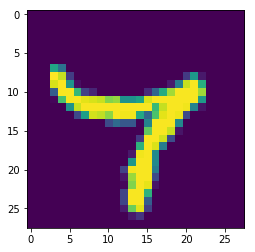

Prediction: 4
Label: 7


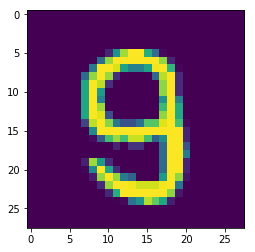

Prediction: 8
Label: 9


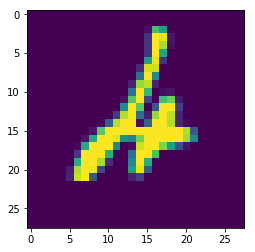

Prediction: 2
Label: 4


In [12]:
j=3
for i in range(0, predictions.size):
    if predictions[i] != Y_test[i]:
        plt.imshow(X_test[i].reshape(28, 28), interpolation='nearest')
        plt.show()
        
        print("Prediction:", predictions[i])
        print("Label:", Y_test[i])
        
        j-=1
        if j <= 0:
            break

In [2]:
# ex 3

# date-time parsing function for loading the dataset
def parser(x):
    if type(x) != type(""):
        return x;
    else:
        return datetime.strptime(x, '%d/%m/%Y %H:%M')

# frame a sequence as a supervised learning problem
def timeseries_to_supervised(data, lag=1):
    df = DataFrame(data)
    columns = [df.shift(i) for i in range(1, lag+1)]
    columns.append(df)
    df = concat(columns, axis=1)
    df.fillna(0, inplace=True)
    return df

# create a differenced series
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return Series(diff)

# invert differenced value
def inverse_difference(history, yhat, interval=1):
    return yhat + history[-interval]

# scale train and test data to [-1, 1]
def scale(train, test):
    # fit scaler
    scaler = MinMaxScaler(feature_range=(-1, 1))
    scaler = scaler.fit(train)
    
    # transform train
    train = train.reshape(train.shape[0], train.shape[1])
    train_scaled = scaler.transform(train)
    
    # transform test
    test = test.reshape(test.shape[0], test.shape[1])
    test_scaled = scaler.transform(test)
    return scaler, train_scaled, test_scaled

# inverse scaling for a forecasted value
def invert_scale(scaler, X, value):
    new_row = [x for x in X] + [value]
    array = np.array(new_row)
    array = array.reshape(1, len(array))
    inverted = scaler.inverse_transform(array)
    return inverted[0, -1]

In [13]:
import tensorflow as tf
from keras import backend as K

sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))
K.tensorflow_backend._get_available_gpus()

['/job:localhost/replica:0/task:0/device:GPU:0',
 '/job:localhost/replica:0/task:0/device:GPU:1']

In [41]:
# fit an GRU network to training data
def fit(train, batch_size, nb_epoch, neurons):
    train = train[:16384]
    X, y = train[:, 0:-1], train[:, -1]
    X = X.reshape(X.shape[0], 1, X.shape[1])
    print(X.shape)
    
    model = Sequential()
    model.add(GRU(neurons, batch_input_shape=(batch_size, X.shape[1], X.shape[2]), stateful=True, return_sequences=True))
    model.add(Dropout(0.4))
    model.add(GRU(int(neurons/2), stateful=True))
    model.add(Dropout(0.4))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    
    for i in range(nb_epoch):
        #print("Real epoch:", i+1)
        model.fit(X, y, validation_split=0.0, epochs=1, batch_size=batch_size, verbose=1, shuffle=False)
        model.reset_states()
    return model

# make a one-step forecast
def forecast_lstm(model, batch_size, X):
    X = X.reshape(1, 1, len(X))
    yhat = model.predict(X, batch_size=batch_size)
    return yhat[0,0]

# load dataset
series = read_csv(r"D:\Python\mnist\new.csv", header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)

# transform data to be stationary
raw_values = series.values
diff_values = difference(raw_values, 1)

# transform data to be supervised learning
supervised = timeseries_to_supervised(diff_values, 1)
supervised_values = supervised.values

# split data into train and test-sets
split_index = 100
train, test = supervised_values[0:-split_index], supervised_values[-split_index:]

# transform the scale of the data
scaler, train_scaled, test_scaled = scale(train, test)

In [45]:
# fit the model
lstm_model = fit(train_scaled, 256, 100, 100)

# forecast the entire training dataset to build up state for forecasting
train_reshaped = train_scaled[:, 0].reshape(len(train_scaled), 1, 1)
lstm_model.predict(train_reshaped, batch_size=1)

# walk-forward validation on the test data
predictions = list()
for i in range(len(test_scaled)):
    # make one-step forecast
    X, y = test_scaled[i, 0:-1], test_scaled[i, -1]
    yhat = forecast_lstm(lstm_model, 1, X)

    # invert scaling
    yhat = invert_scale(scaler, X, yhat)

    # invert differencing
    yhat = inverse_difference(raw_values, yhat, len(test_scaled)+1-i)

    # store forecast
    predictions.append(yhat)
    expected = raw_values[len(train) + i + 1]

(16384, 1, 1)
Epoch 1/1
16384/16384 [==============================] - 3s 203us/step - loss: 0.0015
Epoch 1/1
16384/16384 [==============================] - 0s 29us/step - loss: 0.0014
Epoch 1/1
16384/16384 [==============================] - 0s 28us/step - loss: 0.0013
Epoch 1/1
16384/16384 [==============================] - 0s 29us/step - loss: 0.0014
Epoch 1/1
16384/16384 [==============================] - 0s 28us/step - loss: 0.0014
Epoch 1/1
16384/16384 [==============================] - 0s 29us/step - loss: 0.0014
Epoch 1/1
16384/16384 [==============================] - 0s 29us/step - loss: 0.0014
Epoch 1/1
16384/16384 [==============================] - 0s 29us/step - loss: 0.0014
Epoch 1/1
16384/16384 [==============================] - 0s 29us/step - loss: 0.0014
Epoch 1/1
16384/16384 [==============================] - 0s 29us/step - loss: 0.0014
Epoch 1/1
16384/16384 [==============================] - 0s 29us/step - loss: 0.0013
Epoch 1/1
16384/16384 [===========================

KeyboardInterrupt: 

Test RMSE: 104.839


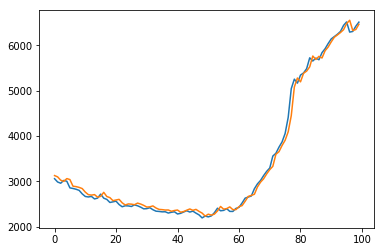

In [11]:
# report performance
rmse = sqrt(mean_squared_error(raw_values[-split_index:], predictions))
print('Test RMSE: %.3f' % rmse)

# line plot of observed vs predicted
pyplot.plot(raw_values[-split_index:])
pyplot.plot(predictions[-split_index:])
pyplot.show()

In [12]:
#store the model and print the summary

lstm_model.summary()
lstm_model.save(r"D:\Python\mnist\model.hdf5")

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_5 (GRU)                  (1, 1, 100)               30600     
_________________________________________________________________
dropout_5 (Dropout)          (1, 1, 100)               0         
_________________________________________________________________
gru_6 (GRU)                  (1, 50)                   22650     
_________________________________________________________________
dropout_6 (Dropout)          (1, 50)                   0         
_________________________________________________________________
dense_3 (Dense)              (1, 1)                    51        
Total params: 53,301
Trainable params: 53,301
Non-trainable params: 0
_________________________________________________________________
